<a href="https://colab.research.google.com/github/amitsiwach/CNN_basics/blob/main/MNIST_CIFAR10_Dataset_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we train a Convolutional Neural Network to classify images from the MNIST database.

### 1. Load MNIST Database

MNIST is one of the most famous datasets in the field of machine learning. 
 - It has 70,000 images of hand-written digits
 - Very straight forward to download
 - Images dimensions are 28x28
 - Grayscale images

In [1]:
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

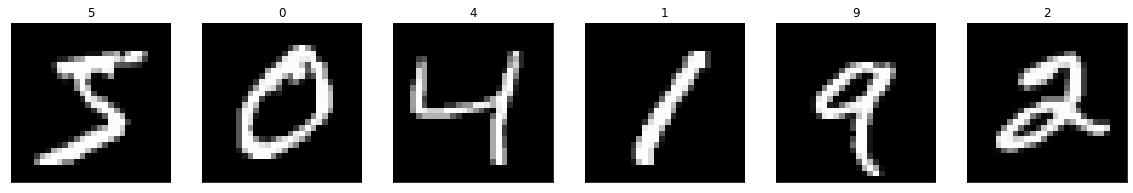

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

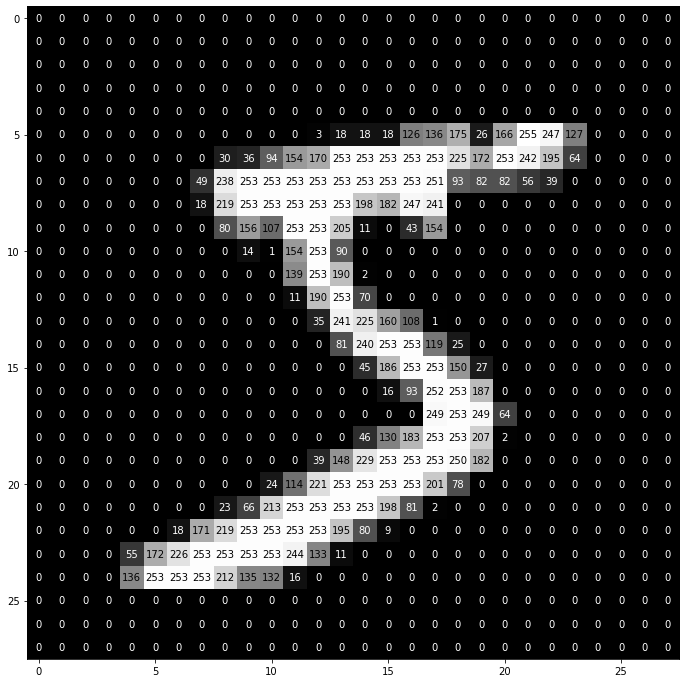

In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Preprocess input images: Rescale the Images by Dividing Every Pixel in Every Image by 255

In [5]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### 5. Preprocess the labels: Encode Categorical Integer Labels Using a One-Hot Scheme

In [6]:
from keras.utils import np_utils

num_classes = 10 
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Reshape data to fit our CNN (and input_shape)

In [7]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


### 7. Define the Model Architecture

You must pass the following arguments:
- filters - The number of filters.
- kernel_size - Number specifying both the height and width of the (square) convolution window.

There are some additional, optional arguments that you might like to tune:

- strides - The stride of the convolution. If you don't specify anything, strides is set to 1.
- padding - One of 'valid' or 'same'. If you don't specify anything, padding is set to 'valid'.
- activation - Typically 'relu'. If you don't specify anything, no activation is applied. You are strongly encouraged to add a ReLU activation function to every convolutional layer in your networks.

** Things to remember ** 
- Always add a ReLU activation function to the **Conv2D** layers in your CNN. With the exception of the final layer in the network, Dense layers should also have a ReLU activation function.
- When constructing a network for classification, the final layer in the network should be a **Dense** layer with a softmax activation function. The number of nodes in the final layer should equal the total number of classes in the dataset.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

# build the model object
model = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1)))

# POOL_1: downsample the image to choose the best features 
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

#### Things to notice:

- The network begins with a sequence of two convolutional layers, followed by max pooling layers.
- The final layer has one entry for each object class in the dataset, and has a softmax activation function, so that it returns probabilities.
- The Conv2D depth increases from the input layer of 1 to 32 to 64. 
- We also want to decrease the height and width - This is where maxpooling comes in. Notice that the image dimensions decrease from 28 to 14 after the pooling layer.
- You can see that every output shape has **None** in place of the batch-size. This is so as to facilitate changing of batch size at runtime.
- Finally, we add one or more fully connected layers to determine what object is contained in the image. For instance, if wheels were found in the last max pooling layer, this FC layer will transform that information to predict that a car is present in the image with higher probability. If there were eyes, legs and a tails, then this could mean that there is a dog in the image.

### 8. Compile the Model

In [9]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 9. Train the Model

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.05052, saving model to model.weights.best.hdf5
938/938 - 68s - loss: 0.1496 - accuracy: 0.9543 - val_loss: 0.0505 - val_accuracy: 0.9835 - 68s/epoch - 72ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.05052 to 0.04387, saving model to model.weights.best.hdf5
938/938 - 62s - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.0439 - val_accuracy: 0.9854 - 62s/epoch - 66ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.04387 to 0.02940, saving model to model.weights.best.hdf5
938/938 - 61s - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0294 - val_accuracy: 0.9902 - 61s/epoch - 65ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.02940 to 0.02853, saving model to model.weights.best.hdf5
938/938 - 61s - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0285 - val_accuracy: 0.9902 - 61s/epoch - 65ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.02853 to 0.02497, saving model to model.weights.best.hdf5
938/938 - 63s - loss: 0.0181

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [11]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [12]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.1600%


### with no padding

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

# build the model object
model = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))

# POOL_1: downsample the image to choose the best features 
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model.add(Conv2D(64, (3, 3), activation='relu'))
# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

#### Things to notice:

- The network begins with a sequence of two convolutional layers, followed by max pooling layers.
- The final layer has one entry for each object class in the dataset, and has a softmax activation function, so that it returns probabilities.
- The Conv2D depth increases from the input layer of 1 to 32 to 64. 
- We also want to decrease the height and width - This is where maxpooling comes in. Notice that the image dimensions decrease from 28 to 14 after the pooling layer.
- You can see that every output shape has **None** in place of the batch-size. This is so as to facilitate changing of batch size at runtime.
- Finally, we add one or more fully connected layers to determine what object is contained in the image. For instance, if wheels were found in the last max pooling layer, this FC layer will transform that information to predict that a car is present in the image with higher probability. If there were eyes, legs and a tails, then this could mean that there is a dog in the image.

### Compile the Model

In [14]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

###  Train the Model

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.07875, saving model to model.weights.best.hdf5
938/938 - 46s - loss: 0.1633 - accuracy: 0.9495 - val_loss: 0.0788 - val_accuracy: 0.9742 - 46s/epoch - 49ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.07875 to 0.05551, saving model to model.weights.best.hdf5
938/938 - 46s - loss: 0.0518 - accuracy: 0.9845 - val_loss: 0.0555 - val_accuracy: 0.9834 - 46s/epoch - 49ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.05551 to 0.03310, saving model to model.weights.best.hdf5
938/938 - 45s - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.0331 - val_accuracy: 0.9895 - 45s/epoch - 48ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.03310 to 0.02584, saving model to model.weights.best.hdf5
938/938 - 45s - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0258 - val_accuracy: 0.9916 - 45s/epoch - 48ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.02584 to 0.02584, saving model to model.weights.best.hdf5
938/938 - 47s - loss: 0.0219

###  Load the Model with the Best Classification Accuracy on the Validation Set

In [16]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

###  Calculate the Classification Accuracy on the Test Set

In [17]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.1200%


# Lets Work with RGB Images

#### Here we will train a CNN to classify images from the CIFAR-10 dataset.


### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


### 2. Visualize the First 24 Training Images

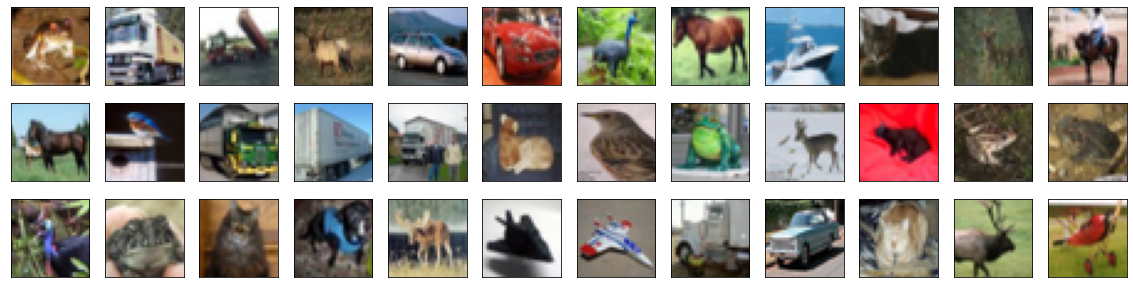

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255
In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very
different scales. Figure below shows Gradient Descent on a training set where features 1 and 2 have the
same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on
the right).

** Tip: ** When using Gradient Descent, you should ensure that all features have a similar scale to speed up training or else it will take much longer to converge.

In [3]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)        

### 6. Compile the Model 

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 7. Train the Model 

In [11]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.25817, saving model to model.weights.best.hdf5
1407/1407 - 61s - loss: 1.2136 - accuracy: 0.5677 - val_loss: 1.2582 - val_accuracy: 0.5548 - 61s/epoch - 44ms/step
Epoch 2/50

Epoch 2: val_loss improved from 1.25817 to 1.24742, saving model to model.weights.best.hdf5
1407/1407 - 60s - loss: 1.0842 - accuracy: 0.6196 - val_loss: 1.2474 - val_accuracy: 0.5626 - 60s/epoch - 43ms/step
Epoch 3/50

Epoch 3: val_loss improved from 1.24742 to 1.17070, saving model to model.weights.best.hdf5
1407/1407 - 62s - loss: 1.0264 - accuracy: 0.6419 - val_loss: 1.1707 - val_accuracy: 0.5914 - 62s/epoch - 44ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 1.17070
1407/1407 - 63s - loss: 0.9992 - accuracy: 0.6568 - val_loss: 1.2165 - val_accuracy: 0.5794 - 63s/epoch - 45ms/step
Epoch 5/50

Epoch 5: val_loss improved from 1.17070 to 1.07802, saving model to model.weights.best.hdf5
1407/1407 - 63s - loss: 0.9842 - accuracy: 0.6658 - val_loss: 1.0

### 8. Load the Model with the Best Validation Accuracy


In [ ]:
model.load_weights('model.weights.best.hdf5')

### 10. Visualize Some Predictions

In [ ]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

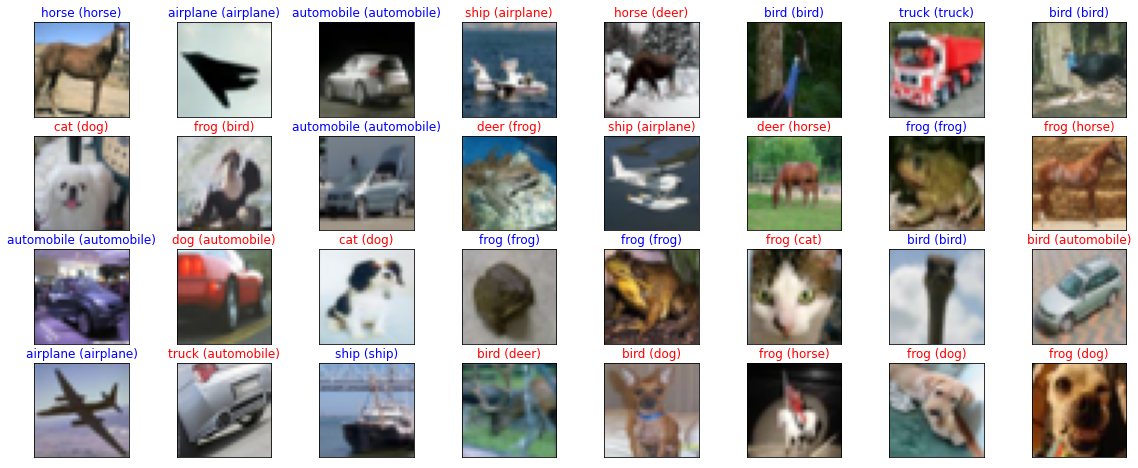

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))